# PROYECTO INTEGRADO

El objetivo de este proyecto es aprovechar los datos dispobnibles de la tienda online Ice para poder obtener información valiosa que contribuya a la toma de decisions estratégicas. Para lograrlo planeo realizar un exhaustivo reprocesamiento de datos, abordando problemas como valores faltantes o erroneos. Luego, llevar a cabo un análisis exploratorio de datos para comprender la distribución y relaciones entre las variables clave, como reseñas de usuarios, clasificaciones de expertos, géneros y plataformas. Además, llevarás a cabo un análisis estadístico para identificar patrones y tendencias que puedan ayudar a prever el éxito de un juego. Esto permitirá detectar proyectos prometedores y planificar campañas publicas efectivas para el año 2017, proporcionando una base sólida para la toma de decisiones informadas en la estrategia de marketing de Ice. 

### Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
# Cargar librerías 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import scipy.stats as stats

In [2]:
# Cargar archivos en DataFrame
df_games=pd.read_csv('games.csv')

### Paso 2. Prepara los datos

In [3]:
df_games.info()  #Visualizamos información del df_games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se evidencia valores ausentes en diferentes columnas del DataFrame.

In [4]:
display(df_games.sample(10)) #Visualizamos los primeros elementos del df_gamers

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14282,Sacra Terra: Angelic Night,PC,2011.0,Puzzle,0.01,0.02,0.00,0.01,NaN,tbd,T
15293,Ballblazer Champions,PS,1997.0,Sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
704,Dead Island,PS3,2011.0,Action,1.08,0.73,0.15,0.31,71.0,6.6,M
11767,The Legend of Kage 2,DS,2008.0,Action,0.07,0.00,0.00,0.00,70.0,6.3,E10+
6993,Gundam Battle Assault,PS,1998.0,Fighting,0.13,0.09,0.00,0.02,61.0,7.8,T
2747,The Lord of the Rings: Conquest,PS3,2009.0,Action,0.38,0.25,0.00,0.11,54.0,7.1,T
12105,Heavenly Guardian,Wii,2007.0,Shooter,0.06,0.00,0.00,0.00,NaN,tbd,E
15183,Enchanted Arms (JP sales),X360,2006.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4198,EA Sports UFC,XOne,2014.0,Sports,0.30,0.12,0.00,0.04,70.0,6.3,T
1728,Mission: Impossible,N64,1997.0,Action,0.74,0.38,0.02,0.03,NaN,NaN,NaN


In [5]:
#Colocamos las columnas del df_games en minúsculas
df_games.columns=df_games.columns.str.lower()

#Visualizamos el DataFrame con nombres de columnas en minúsculas
display(df_games.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12178,Legends of Wrestling II,GBA,2002.0,Fighting,0.05,0.02,0.00,0.00,24.0,3.7,E
10455,Digimon Story: Lost Evolution,DS,2010.0,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
2586,Momotarou Dentetsu 7,PS,1997.0,Simulation,0.00,0.00,0.74,0.05,NaN,NaN,NaN
15021,Assault Suit Leynos,PS4,2016.0,Shooter,0.02,0.00,0.00,0.00,67.0,tbd,E10+
540,The Sims,PS2,2003.0,Simulation,1.41,1.12,0.00,0.24,83.0,7.7,T


Para facilitar el trabajo con las culumnas del DataFrame se cambian todos los nombres y se coloca en minúsculas. 

In [6]:
#Convertir year_of_release a entero porque los años no son decimales, y deben relacionarse al tipo de información que está mostrando.
df_games['year_of_release']=df_games['year_of_release'].astype('Int64')

#Convertir user_score a tipo flotante porque a lo largo de la fila existen números decimales, utilizo el método pd.to_numeric de panda para evitar errores por el valor no numerico NaN
df_games['user_score']=pd.to_numeric(df_games['user_score'], errors='coerce')

display(df_games.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
477,The Sims: Livin Large,PC,2000,Misc,1.67,1.18,0.00,0.13,82.0,6.6,T
9809,Godzilla Unleashed: Double Smash,DS,2007,Action,0.11,0.00,0.00,0.01,28.0,4.9,E
13917,Brothers In Arms DS,DS,2007,Shooter,0.03,0.00,0.00,0.00,72.0,8.0,T
13493,Danny Phantom: Urban Jungle,DS,2006,Action,0.04,0.00,0.00,0.00,NaN,NaN,NaN
13089,Little Busters! Converted Edition,PS2,2009,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN


Convertir year_of_release a entero porque los años no son decimales, y deben relacionarse al tipo de información adecuado. Convertir user_score a tipo flotante porque a lo largo de la fila existen números decimales, utilizo el método pd.to_numeric de panda para evitar errores por el valor no numerico NaN

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Analizamos los datos de los valores ausentes

In [8]:
#Utilizo el metodo describe para obtener información sobre las columnas numéricas de datos 
display(df_games.describe())


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.0,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.87705,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.0,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [9]:
#Identificamos la cantidad de valores ausentes por columna. 
null_value=df_games.isnull().sum()
display(null_value)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
#Eliminar filas de la columna name,porque al eliminar los valores no representa problema significativo al momento de realizar análisis estadísticos a futuro
df_games_cleaned = df_games.dropna(subset=['name','year_of_release'], inplace=True)

print(df_games.isnull().sum())



name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


Se eliminan filas de la columna name y year_of_release,porque no representa problema significativo al momento de realizar análisis estadísticos a futuro y evita errores en cálculos matemáticos. 

In [11]:
#Remplazar los valores ausentes por la mediana, ya que representa mejor el valor para no alterar los resultados estadísticos  

df_games['critic_score'].fillna(df_games['critic_score'].median(),inplace=True)


#Para el resto de columnas su valor en blanco o cero porque es un string y no modifica ningún resultado a nivel de cálculo matemático
df_games['rating'].fillna('NaN',inplace=True)

print(df_games.isnull().sum())
print()
display(df_games.describe())




name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         8981
rating                0
dtype: int64



,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.0,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,70.026332,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,9.750209,1.499447
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,71.000000,6.400000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.0,0.240000,0.110000,0.040000,0.030000,71.000000,8.200000
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Remplazar los valores ausentes por la mediana en la columna "critic_score", ya que representa mejor el valor para no alterar resultados al momento de realizar cálculos. Para el resto de columnas "rating" su valor se reemplaza por NaN po que eso no afecta al resultado al momento de analizar la data.

In [12]:
# Convertir la columna 'user_score' a tipo float, tratando valores no numéricos como NaN
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Imputar los valores faltantes con la mediana de 'user_score'
median_user_score = df_games['user_score'].median()
df_games['user_score'] = df_games['user_score'].fillna(median_user_score)

# Verificar que ya no hay valores faltantes
display(df_games.sample(5))
print
print(df_games.isnull().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3979,RPG Maker,PS,1997,Role-Playing,0.11,0.07,0.29,0.03,66.0,8.2,E
6934,Ar tonelico Qoga: Knell of Ar Ciel,PS3,2010,Role-Playing,0.08,0.01,0.13,0.01,61.0,5.4,M
2510,Killer Instinct Gold,N64,1996,Fighting,0.61,0.19,0.00,0.01,71.0,7.5,NaN
15985,Romance of the Three Kingdoms XII,WiiU,2012,Strategy,0.00,0.00,0.02,0.00,71.0,7.5,NaN
9627,Freedom Fighters,GC,2003,Shooter,0.10,0.03,0.00,0.00,83.0,7.8,T


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Finalmente se convierte la columna 'user_score' a tipo float, tratando valores no numéricos como NaN. Y se imputar los valores faltantes con la mediana de 'user_score'.

En los pasos anteriores se verifica los datos y se cambian los tipos según requerimiento y además se tratan los valores audentes de esta manera facilitará el análisis de datos a lo largo del proyecto. 

In [13]:
# Crear una nueva columna 'total_sales' que contiene la suma de las ventas en todas las regiones
df_games['total_sales']=df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

#Mostrar el DataFrame con la nueva columna
display(df_games.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4469,Need for Speed: Shift 2 Unleashed,X360,2011,Racing,0.18,0.21,0.00,0.04,71.0,7.5,NaN,0.43
1646,SimCity 2000,PS,1996,Simulation,0.68,0.46,0.00,0.08,71.0,7.5,NaN,1.22
5325,Metal Arms: Glitch in the System,PS2,2003,Shooter,0.17,0.13,0.00,0.04,81.0,8.9,T,0.34
14000,Magical Starsign (JP sales),DS,2006,Role-Playing,0.00,0.00,0.04,0.00,71.0,7.5,NaN,0.04
4467,Nicktoons: Attack of the Toybots,Wii,2007,Platform,0.40,0.00,0.00,0.03,60.0,6.0,E,0.43


### Paso 3. Analiza los datos

In [14]:
#Contar la cantidad de juegos lanzados en cada año
games_per_year=df_games['year_of_release'].value_counts().sort_index()

#Mostrar el número de juegos lanzado por año
display(games_per_year)

#Mostrar estadística descriptiva de la distribución de juegos por año 
display(games_per_year.describe())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64

count          37.0
mean     444.432432
std      451.604334
min             9.0
25%            36.0
50%           338.0
75%           762.0
max          1427.0
Name: count, dtype: Float64

La cantidad de juegos lanzados por año varían significativamente, desde 9 juegos en 1980 hasta 1427 juegos como cantidad max de juego en un año.
La distribución muestra una tendencia creciente a lo largo de los años

La media de juegos lanzado por año es de aproximadamente 444.
La desviación estandar es alta con 452 lo que significa una alta variabilidad de jugos lanzados de un año a otro.


In [15]:
#Indicar plataformas con mayores ventas totales
platform_total_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#Se elige en número de plataforma con mayor venta para elegir y graficar. 
top_platform = platform_total_sales.head(4)

#Visualización de las plataformas con mayor venta
display(platform_total_sales.head(10))


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

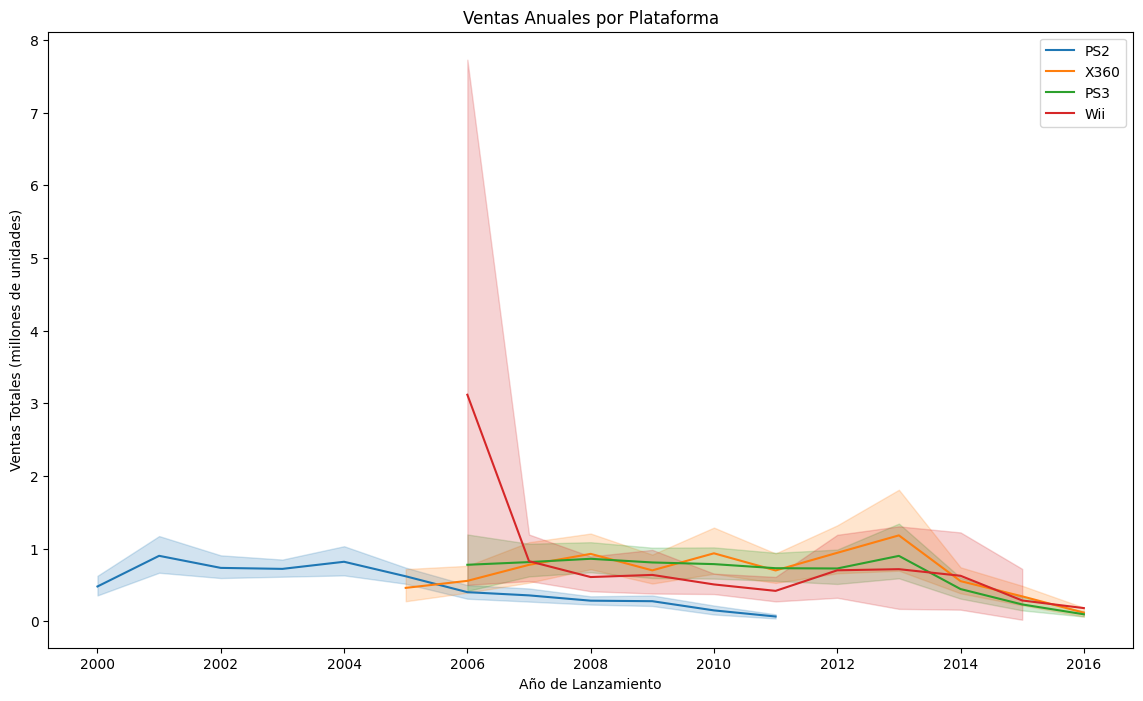

In [16]:
plt.figure(figsize=(14, 8))
for platform in top_platform.index:
    platform_data = df_games[df_games['platform'] == platform]
    sns.lineplot(data=platform_data, x='year_of_release', y='total_sales', label=platform)

plt.title('Ventas Anuales por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones de unidades)')
plt.legend()
plt.show()


#plt.figure(figsize=(14, 8))
#for platform in top_platform.index:
#    platform_data = df_games[df_games['platform'] == platform]
#    sns.scatterplot(data=platform_data, x='year_of_release', y='total_sales', label=platform, s=50)

#plt.title('Ventas Anuales por Plataforma')
#plt.xlabel('Año de Lanzamiento')
#plt.ylabel('Ventas Totales (millones de unidades)')
#plt.legend()
#plt.show()

Se puede visualizar qe las ventas anuales por plataforma es liderada por Wii con un aproximado de 7 millones de dólares en ventas, y du tiempo de vida es desde el 2006 hasta la actualidad 2016.

In [17]:
#Identificar plataformas con bajas ventas o sin ventas
inactive_platform = df_games.groupby('platform')['total_sales'].sum().sort_values()
print(inactive_platform.head())

platform
PCFX    0.03
GG      0.04
3DO     0.10
TG16    0.16
WS      1.42
Name: total_sales, dtype: float64


In [18]:
#Analizar la duración de la plataforma
#Calcular el año de lanzamiento máximo y mínimo
platform_lifecycle = df_games.groupby('platform')['year_of_release'].agg(['min','max'])

#Calculamos la diferencia entre los años maximos y mínimos y se coloca en la columna llamada lifetime
platform_lifecycle['lifetime'] = platform_lifecycle['max'] - platform_lifecycle['min']
print(platform_lifecycle)

           min   max  lifetime
platform                      
2600      1980  1989         9
3DO       1994  1995         1
3DS       2011  2016         5
DC        1998  2008        10
DS        1985  2013        28
GB        1988  2001        13
GBA       2000  2007         7
GC        2001  2007         6
GEN       1990  1994         4
GG        1992  1992         0
N64       1996  2002         6
NES       1983  1994        11
NG        1993  1996         3
PC        1985  2016        31
PCFX      1996  1996         0
PS        1994  2003         9
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2011  2016         5
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB        2000  2008         8
XOne    

Para establecer el período relevante para construir el modelo para 2017, se tiene que construir un periodo relevante basandonos en la duración de vida de la plataforma.

In [19]:

# Realizamos un periodo de tiempo para poder filtrar la información
relevant_period_start = 2008
relevant_period_end = 2016

# Filtrar el DataFrame para incluir solo el período relevante   
df_relevant_data = df_games[(df_games['year_of_release'] >= relevant_period_start) & (df_games['year_of_release'] <= relevant_period_end)]

# Actualiza el DataFrame oroginal 
df_games = df_games.loc[(df_games['year_of_release'] >= relevant_period_start) & (df_games['year_of_release'] <= relevant_period_end)]

# Verificar los primeros registros del nuevo DataFrame
print(df_games.head())


                         name platform  year_of_release     genre  na_sales  \
2              Mario Kart Wii      Wii             2008    Racing     15.68   
3           Wii Sports Resort      Wii             2009    Sports     15.61   
8   New Super Mario Bros. Wii      Wii             2009  Platform     14.44   
14         Kinect Adventures!     X360             2010      Misc     15.00   
15               Wii Fit Plus      Wii             2009    Sports      9.01   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
2      12.76      3.79         3.29          82.0         8.3      E   
3      10.93      3.28         2.95          80.0         8.0      E   
8       6.94      4.70         2.24          87.0         8.4      E   
14      4.89      0.24         1.69          61.0         6.3      E   
15      8.49      2.53         1.77          80.0         7.4      E   

    total_sales  
2         35.52  
3         32.77  
8         28.32  
14        21.82  
15

In [20]:
# Identificar las plataformas líderes en ventas 
top_plataformas = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filtrar el DataFrame para incluir solo las plataformas líderes
df_top_plataformas = df_games[df_games['platform'].isin(top_plataformas)]
# Mostrar el resultado
print(df_top_plataformas.head())


                         name platform  year_of_release     genre  na_sales  \
2              Mario Kart Wii      Wii             2008    Racing     15.68   
3           Wii Sports Resort      Wii             2009    Sports     15.61   
8   New Super Mario Bros. Wii      Wii             2009  Platform     14.44   
14         Kinect Adventures!     X360             2010      Misc     15.00   
15               Wii Fit Plus      Wii             2009    Sports      9.01   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
2      12.76      3.79         3.29          82.0         8.3      E   
3      10.93      3.28         2.95          80.0         8.0      E   
8       6.94      4.70         2.24          87.0         8.4      E   
14      4.89      0.24         1.69          61.0         6.3      E   
15      8.49      2.53         1.77          80.0         7.4      E   

    total_sales  
2         35.52  
3         32.77  
8         28.32  
14        21.82  
15

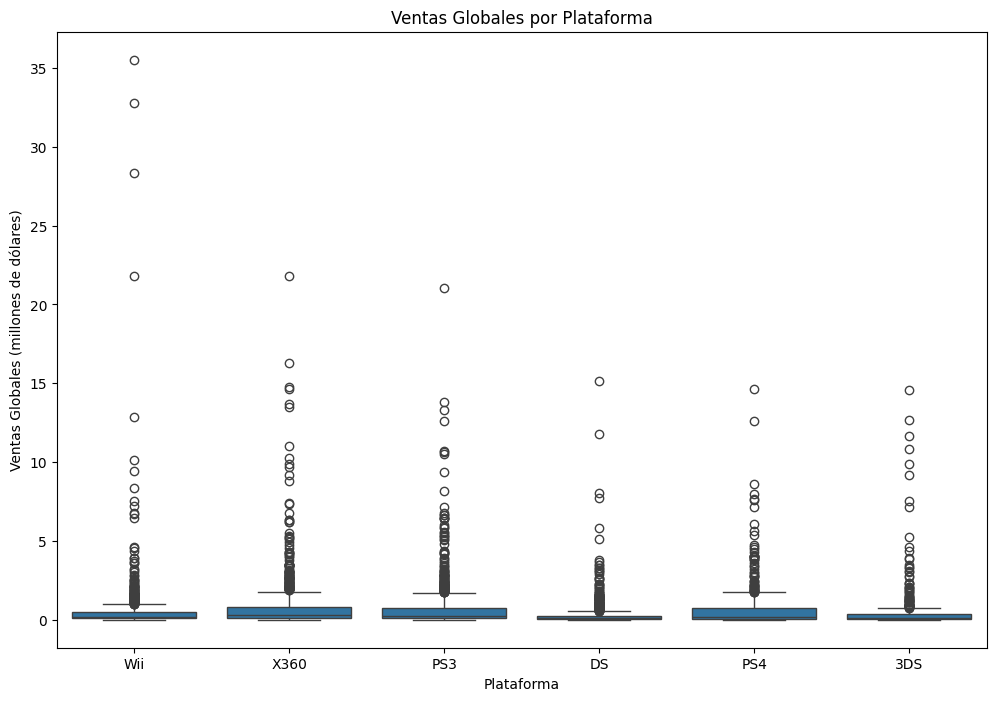

In [21]:
# Identificar las plataformas líderes en ventas
top_plataformas = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index.tolist()

# Filtrar el DataFrame para incluir solo las plataformas líderes
df_top_plataformas = df_games[df_games['platform'].isin(top_plataformas)]

# Crear un diagrama de caja para las ventas globales de todos los juegos, desglosadas por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=df_top_plataformas)
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de dólares)')
plt.show()

Se realizó una gráfica de cajas de las primera 6 plataformas más relevantes y vendidas, en ella podemos notar que Wii está en el primer lugar con su mayor venta de 35 millones de dólares, sin embargo la diferencia de las otras plataformas no es significativa y podemos dar cuenta de que los promedios está muy cercanos al cero, o tendidos hacia la izquierda.  

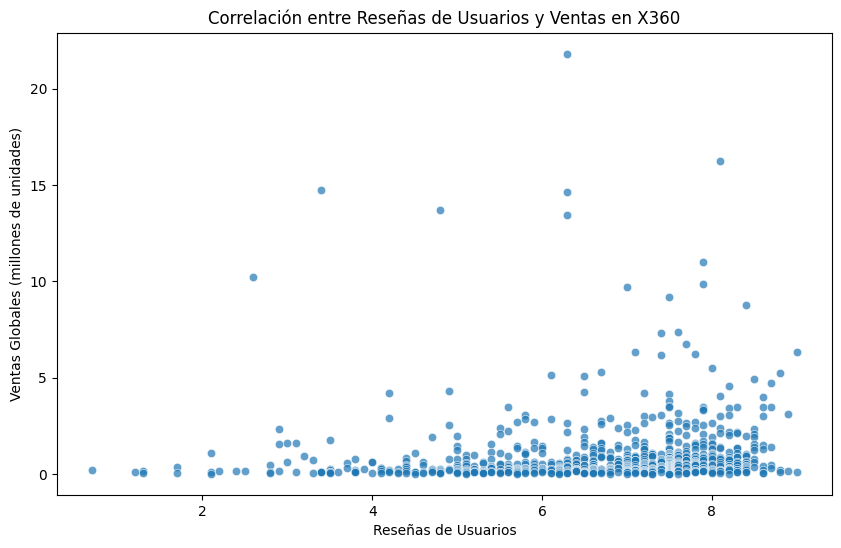

In [22]:
# Seleccionamos una plataforma popular (por ejemplo, 'PS4')
platform_election = 'X360'

# Filtramos el DataFrame para incluir solo la plataforma seleccionada
df_plataforma = df_games[df_games['platform'] == platform_election]

# Creamos un gráfico de dispersión entre reseñas de usuarios y ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=df_plataforma, alpha=0.7)
plt.title(f'Correlación entre Reseñas de Usuarios y Ventas en {platform_election}')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Globales (millones de unidades)')
plt.show()



Podemos visualizar que para la plataforma PS4 la reseña de usuario recae entre 6 y 9 para ventas menores a 2 millones

In [23]:
# Calculamos la correlación entre reseñas de usuario y ventas 
correlacion_user_sales = df_plataforma['user_score'].corr(df_plataforma['total_sales'])
print(f'Correlación entre Reseñas de Usuarios y Ventas en {platform_election}: {correlacion_user_sales}')

Correlación entre Reseñas de Usuarios y Ventas en X360: 0.037422661864232896


La correlación entre reseña de usuarios y ventas en PS4 es de -0.06 lo que indica que no existe correlación , se hizo pruebas con otras plataformas y el resultado es muy cercano a cero. Por lo que puedo deducir que no existe correlación.

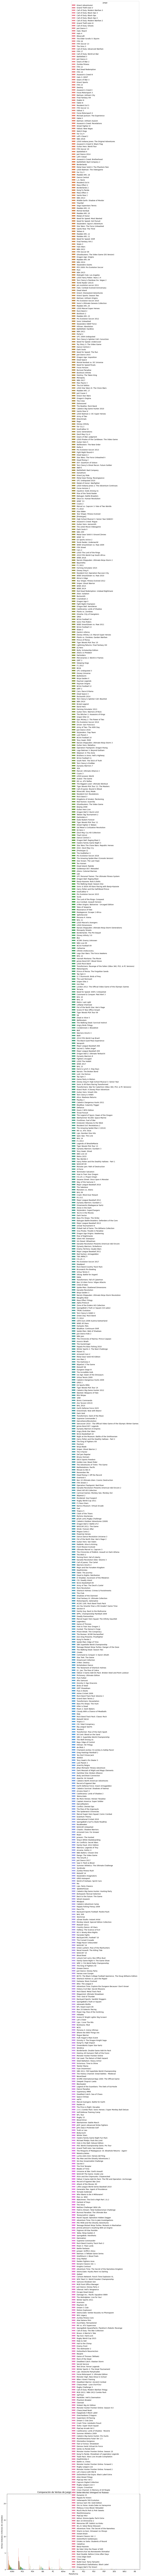

In [24]:
# Comparación de ventas de los mismos juegos en otras plataformas
juegos_comunes = df_games[df_games['name'].isin(df_plataforma['name'])]
plt.figure(figsize=(14, 8))
sns.barplot(x='platform', y='total_sales', data=juegos_comunes, hue='name')
plt.title('Comparación de Ventas de Juegos Comunes en Diferentes Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de unidades)')
plt.legend(title='Juego')
plt.show()

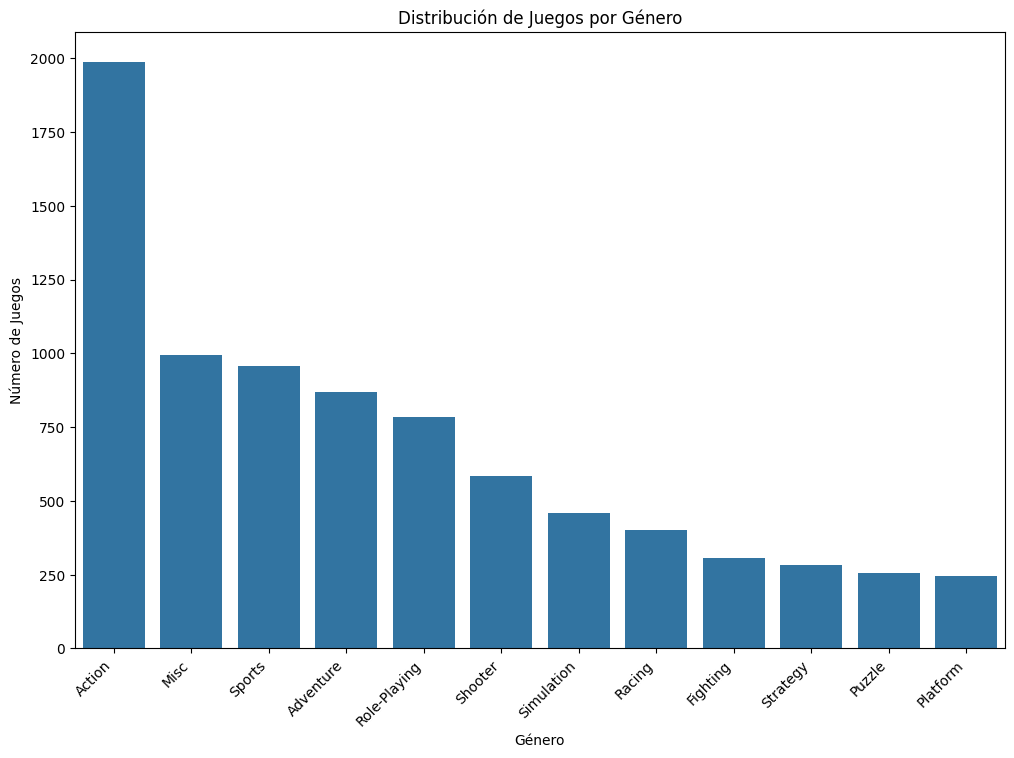

In [25]:
# Distribución general de juegos por género
plt.figure(figsize=(12, 8))
sns.countplot(x='genre', data=df_games, order=df_games['genre'].value_counts().index)
plt.title('Distribución de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.show()

No cabe duda de que el género preferido por las plataformas para los juegos es la de acción, con aproximadamente 2000 juegos, seguida de misc con 1000. Esta información es valiosa si se quiere tener un proyecto por género de juego. 

### Paso 4. Crea un perfil de usuario para cada región*

In [26]:
#Top 5 plataformas en NA
top_platform_na = df_games.groupby('platform')['na_sales'].sum().nlargest(5)

#Top 5 plataformas en UE
top_platform_ue = df_games.groupby('platform')['eu_sales'].sum().nlargest(5)

#Top 5 plataformas en JP
top_platform_jp = df_games.groupby('platform')['jp_sales'].sum().nlargest(5)

#Imprimir los resultados
print("Top 5 Plataformas en NA:\n",top_platform_na)
print("Top 5 Plataformas en UE:\n",top_platform_ue)
print("Top 5 Plataformas en JP:\n",top_platform_jp)


Top 5 Plataformas en NA:
 platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
Name: na_sales, dtype: float64
Top 5 Plataformas en UE:
 platform
PS3     293.73
X360    234.88
Wii     170.74
PS4     141.09
PC       92.17
Name: eu_sales, dtype: float64
Top 5 Plataformas en JP:
 platform
3DS    100.62
DS      76.12
PS3     74.11
PSP     60.46
Wii     47.01
Name: jp_sales, dtype: float64


Podemos darnos cuenta que de las 3 regiones Norteamérica tiene el valor más alto del mercado, luego sigue Euroa y finalmente Japon. También que en ambas regiones el PS3 y Wii se encuentran en las 3 regiones dentro del top5.
El valor de diferencia es de aproximadamente 200 entre un mercado a otro. 

In [27]:
#Top 5 genero en NA
top_genre_na = df_games.groupby('genre')['na_sales'].sum().nlargest(5)

#Top 5 genero en UE
top_genre_ue = df_games.groupby('genre')['eu_sales'].sum().nlargest(5)

#Top 5 genero en JP
top_genre_jp = df_games.groupby('genre')['jp_sales'].sum().nlargest(5)

#Imprimir los resultados
print("Top 5 Plataformas en NA:\n",top_genre_na)
print("Top 5 Plataformas en UE:\n",top_genre_ue)
print("Top 5 Plataformas en JP:\n",top_genre_jp)

Top 5 Plataformas en NA:
 genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64
Top 5 Plataformas en UE:
 genre
Action          310.59
Shooter         208.35
Sports          185.19
Misc            107.00
Role-Playing     94.46
Name: eu_sales, dtype: float64
Top 5 Plataformas en JP:
 genre
Role-Playing    138.12
Action           90.16
Misc             37.33
Sports           30.69
Adventure        23.36
Name: jp_sales, dtype: float64


Podemos concluir que el género de Acción es el preferido en todas las regiones. Shooter es el número 2 en la región de Norteamérica y en europa. El valor más alto del mercado lo tiene Norteamérica en comparación de Europa y Japón. 

In [28]:
#Impacto de las clasificaciones de ESRB 
#Agrupar por clasificación ESRB y calcular las ventas promedio en cada región

sales_by_classification = df_games.groupby('rating')[['na_sales','eu_sales','jp_sales']].mean()

# Imprimir los resultados 
print("Ventas Promedio por Clasificación ESRB:\n", sales_by_classification)

Ventas Promedio por Clasificación ESRB:
         na_sales  eu_sales  jp_sales
rating                              
E       0.294531  0.179161  0.042331
E10+    0.257020  0.147480  0.026194
EC      0.220000  0.000000  0.000000
M       0.538692  0.388692  0.042154
NaN     0.072235  0.062430  0.072926
RP      0.000000  0.030000  0.000000
T       0.222768  0.137753  0.047364


La clasificación M tiene el promedio más elevado en Norteamérica y Europa. Los valores promedios más elevados, los que impactas en ventas por Clasificación ESRB los tiene Norteamérica y los mas bajos están en Japón. 

### Paso 5. Prueba las siguientes hipótesis:

Para la primera afirmación: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Hipótesis nula(HO): La media de las calificaciones de los usiarios para Xbox One es igual a la media de las calificaciones de los usuarios para PC.

- Hipotesis alternativa (H1): La media de las calificaciones de los usuarios para Xbox one no es igual a la media de las calificaciones de los usuarios para PC. 

In [29]:
# Filtrar datos para Xbox One y PC y eliminar filas con valores nulos
xbox_one_ratings = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

# Verificar si hay suficientes datos para realizar la prueba t
if len(xbox_one_ratings) > 1 and len(pc_ratings) > 1:
    # Realizar la prueba t de dos muestras
    t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True)

    # Mostrar los resultados de la prueba t de dos muestras
    print("Prueba t de dos muestras para comparar calificaciones de usuarios entre Xbox One y PC:")
    print(f"Estadístico de prueba: {t_statistic}")
    print(f"Valor p: {p_value}")

    # Evaluar las hipótesis nula y alternativa
    alpha = 0.05
    if p_value < alpha:
        print("\nRechazar la hipótesis nula: Hay evidencia suficiente para afirmar que las medias de calificaciones son diferentes.")
    else:
        print("\nNo se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las medias de calificaciones son diferentes.")
else:
    print("No hay suficientes datos para realizar la prueba t de dos muestras.")

Prueba t de dos muestras para comparar calificaciones de usuarios entre Xbox One y PC:
Estadístico de prueba: -1.1081247779563217
Valor p: 0.2681016926127432

No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las medias de calificaciones son diferentes.


Se usa prueba t de dos muestras poque permite comparar los medias de dos grupos independientes. En el procedimiento anterior comparamos las calificaciones de usuarios entre las plataformas Xbox One y PC. Obtuvimos un valor p de 0.027, que es mayor que el nivel de significancia alfa de 0.05. Esto sugiere que no hay diferencia significativa en las calificaciones de usuarios entre las dos plataformas.

Para la segunda afirmación: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [30]:
# Filtrar datos para los géneros de Acción y Deportes y eliminar filas con valores nulos
accion_ratings = df_games[df_games['genre'] == 'Action']['user_score']
deportes_ratings = df_games[df_games['genre'] == 'Sports']['user_score']

# Verificar si hay suficientes datos para realizar la prueba t
if len(accion_ratings) > 1 and len(deportes_ratings) > 1:
    # Realizar la prueba t de dos muestras
    t_statistic, p_value = stats.ttest_ind(accion_ratings, deportes_ratings, equal_var=True)

    # Mostrar los resultados de la prueba t de dos muestras
    print("Prueba t de dos muestras para comparar calificaciones promedio de usuarios:")
    print(f"Estadístico de prueba: {t_statistic}")
    print(f"Valor p: {p_value}")

    # Evaluar las hipótesis nula y alternativa
    alpha = 0.05
    if p_value < alpha:
        print("\nRechazar la hipótesis nula: Hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.")
    else:
        print("\nNo se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.")
else:
    print("No hay suficientes datos para realizar la prueba t de dos muestras.")

Prueba t de dos muestras para comparar calificaciones promedio de usuarios:
Estadístico de prueba: 6.912424406337946
Valor p: 5.817973354882115e-12

Rechazar la hipótesis nula: Hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.


Se usa t de dos muestras para comparar medias de dos grupos independientes. Ya que en este caso queremos comparar clasificaciones promedio de usuarios para os géneros de Acción y Deportes. El valor p resultante es demasiado pequeño, lo que indica que hay evidecia significativa en contra de la hipótesis nula. Dado que el valor p es menor que el nivel de significancia alfa = 0.05, se rechaza la hipótesis nula en favor de la hipótesis alternativa. Por lo tanto se rechaza la idea de que las calificaciones promedio son igauales para ambos géneros. 